#### 다나와 무선청소기 데이터 시각화


##### 시각화용 모듈 import

In [3]:
import matplotlib
# from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc, rcParams
import seaborn as sns

import pandas as pd
import numpy as np

font_path = 'C:/Windows/Fonts/NanumGothic.ttf'
font = font_manager.FontProperties(fname=font_path).get_name() # 'NanumGothic'
rc('font', family=font)
rcParams['axes.unicode_minus'] = False 

In [ ]:
# 데이터 가져오기
df_product = pd.read_excel('./3_다나와_핸디스틱청소기_결과.xlsx')
df_product

In [ ]:
# 사용시간 기준 정렬 / 결측치 NaN가 있으면 정렬도 안되지만, 통계도 제대로 안나옴
# 
df_product.sort_values(['사용시간'],ascending=True)

In [ ]:
# 추가 전처리 사용시간, 흡입력이 NaN이면, 0.0으로 치환
df_product.info()

In [ ]:
# 사용시간 중에서 NaN 찾기
df_product['사용시간'].isna()

In [ ]:
# 사용시간 NaN을 0으로 대체 -> 결측치 제거하는 것 중에서 가장 일반적
df_product['사용시간'].fillna(0)

In [ ]:
df_product

In [10]:
# 흡입력 NaN을 0으로 치환
df_product['흡입력'].fillna(0, inplace=True)

In [ ]:
# 사용시간 기준 정렬
df_product.sort_values(['사용시간'], ascending=False)

In [ ]:
# 흡입력 기준 정렬
df_product.sort_values(['흡입력'], ascending=False)

In [ ]:
# 가격 기준 정렬
df_product.sort_values(['가격'], ascending=False)

In [ ]:
# 흡입력 & 사용시간 TOP리스트
top_list = df_product.sort_values(['흡입력', '사용시간'], ascending=False)
top_list

#### 가성비 좋은 제품

In [18]:
# 평균값 정리
price_mean = df_product['가격'].mean()
usetime_mean = df_product['사용시간'].mean()
suction_mean = df_product['흡입력'].mean()
print(f'가격 평균 : {price_mean}원, 사용시간 평균: {usetime_mean}분, 흡입력 평균: {suction_mean}W')

가격 평균 : 418587.6005802708원, 사용시간 평균: 43.94660734149055분, 흡입력 평균: 116.90599613152806W


In [23]:
condition = (df_product['가격'] <= price_mean) & (df_product['사용시간'] >= usetime_mean) & (df_product['흡입력'] >= suction_mean)

df_bestratio = df_product[condition]
df_bestratio

,카테고리,회사명,제품명,가격,사용시간,흡입력
3,핸디스틱청소기,샤오미,드리미 V11,179000,90.0,250.0
17,핸디스틱청소기,샤오미,드리미 V10,153216,60.0,220.0
20,핸디스틱청소기,DIBEA,23년형 리뉴얼 차이슨 ALLNEW29000,239000,50.0,400.0
23,핸디스틱청소기,아이닉,NEW i20 (23년형),169000,50.0,350.0
33,핸디스틱청소기,삼성전자,제트 VS20T92K3QD,412030,60.0,200.0
...,...,...,...,...,...,...
922,핸디스틱청소기,샤오미,디어마 VC20 프로,179990,50.0,170.0
925,핸디스틱청소기,샤오미,G10 라이트,338000,45.0,170.0
940,핸디스틱청소기,SINOLINK,V20 프로,166000,45.0,200.0
942,핸디스틱청소기,샤오미,미지아 1C SCWXCQ02ZHM,252740,60.0,200.0


In [24]:
# axis=0 -> 행,  axis=1 -> 열
df_bestratio.dropna(axis=0)

,카테고리,회사명,제품명,가격,사용시간,흡입력
3,핸디스틱청소기,샤오미,드리미 V11,179000,90.0,250.0
17,핸디스틱청소기,샤오미,드리미 V10,153216,60.0,220.0
20,핸디스틱청소기,DIBEA,23년형 리뉴얼 차이슨 ALLNEW29000,239000,50.0,400.0
23,핸디스틱청소기,아이닉,NEW i20 (23년형),169000,50.0,350.0
33,핸디스틱청소기,삼성전자,제트 VS20T92K3QD,412030,60.0,200.0
...,...,...,...,...,...,...
922,핸디스틱청소기,샤오미,디어마 VC20 프로,179990,50.0,170.0
925,핸디스틱청소기,샤오미,G10 라이트,338000,45.0,170.0
940,핸디스틱청소기,SINOLINK,V20 프로,166000,45.0,200.0
942,핸디스틱청소기,샤오미,미지아 1C SCWXCQ02ZHM,252740,60.0,200.0


In [27]:
# 흡입력, 사용시간 최대값/평균값
usetime_max = df_product['사용시간'].max()
usetime_mean = df_product['사용시간'].mean()
suction_max = df_product['흡입력'].max()
suction_mean = df_product['흡입력'].mean()


##### 데이터 분포 그래프 시각화

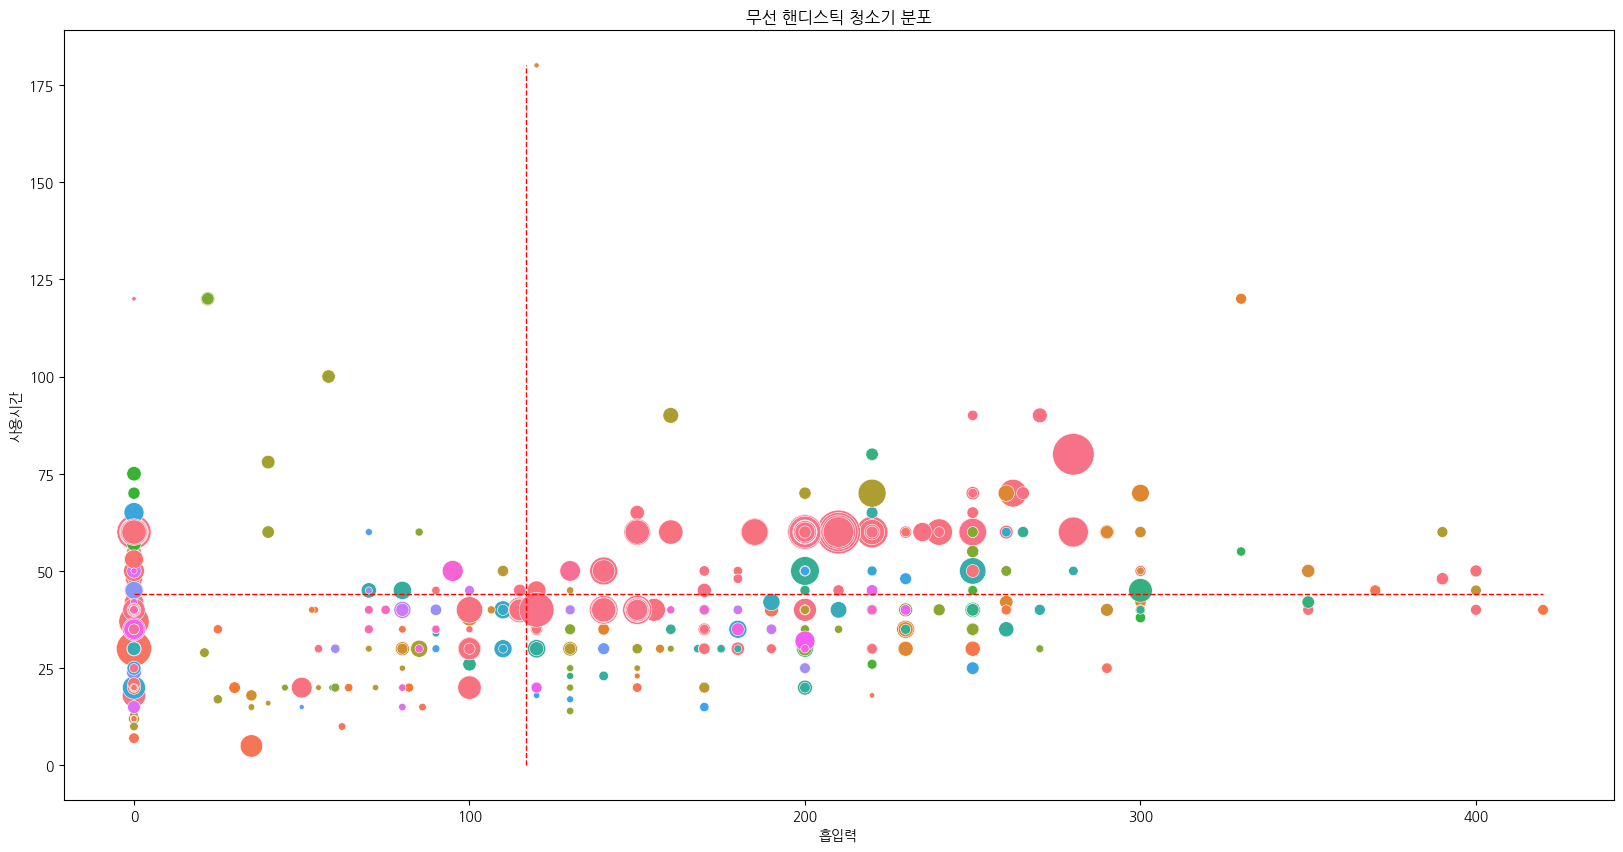

In [36]:
plt.figure(figsize=(20, 10))
plt.title('무선 핸디스틱 청소기 분포')
sns.scatterplot(data=df_product, x='흡입력', y='사용시간', size='가격', hue=df_product['회사명'], legend=False, sizes=(10, 1000))
plt.plot([0, suction_max], [usetime_mean, usetime_mean], 'r--', lw=1)
plt.plot([suction_mean, suction_mean], [0, usetime_max], 'r--', lw=1)
plt.show()

In [38]:
# 상위 20개 제품의 모델비교
df_top20 = df_product[0:20]
df_top20

,카테고리,회사명,제품명,가격,사용시간,흡입력
0,핸디스틱청소기,삼성전자,비스포크 제트 VS20B956D5,555480,60.0,220.0
1,핸디스틱청소기,LG전자,오브제컬렉션 코드제로 A9S AX9984,1136630,60.0,250.0
2,핸디스틱청소기,LG전자,오브제컬렉션 코드제로 AS9202WD,530620,60.0,210.0
3,핸디스틱청소기,샤오미,드리미 V11,179000,90.0,250.0
4,핸디스틱청소기,삼성전자,비스포크 제트 VS20A956A3,479310,60.0,210.0
5,핸디스틱청소기,다이슨,V12 디텍트 슬림 컴플리트,782910,60.0,150.0
6,핸디스틱청소기,LG전자,오브제컬렉션 코드제로 A9 AU9272WD,750510,60.0,220.0
7,핸디스틱청소기,LG전자,코드제로 A9S AT9200BA,580000,60.0,200.0
8,핸디스틱청소기,삼성전자,비스포크 제트 AI VS25C970DW,751470,60.0,250.0
9,핸디스틱청소기,LG전자,오브제컬렉션 코드제로 A9S AU9882,714290,60.0,220.0


posx and posy should be finite values
posx and posy should be finite values


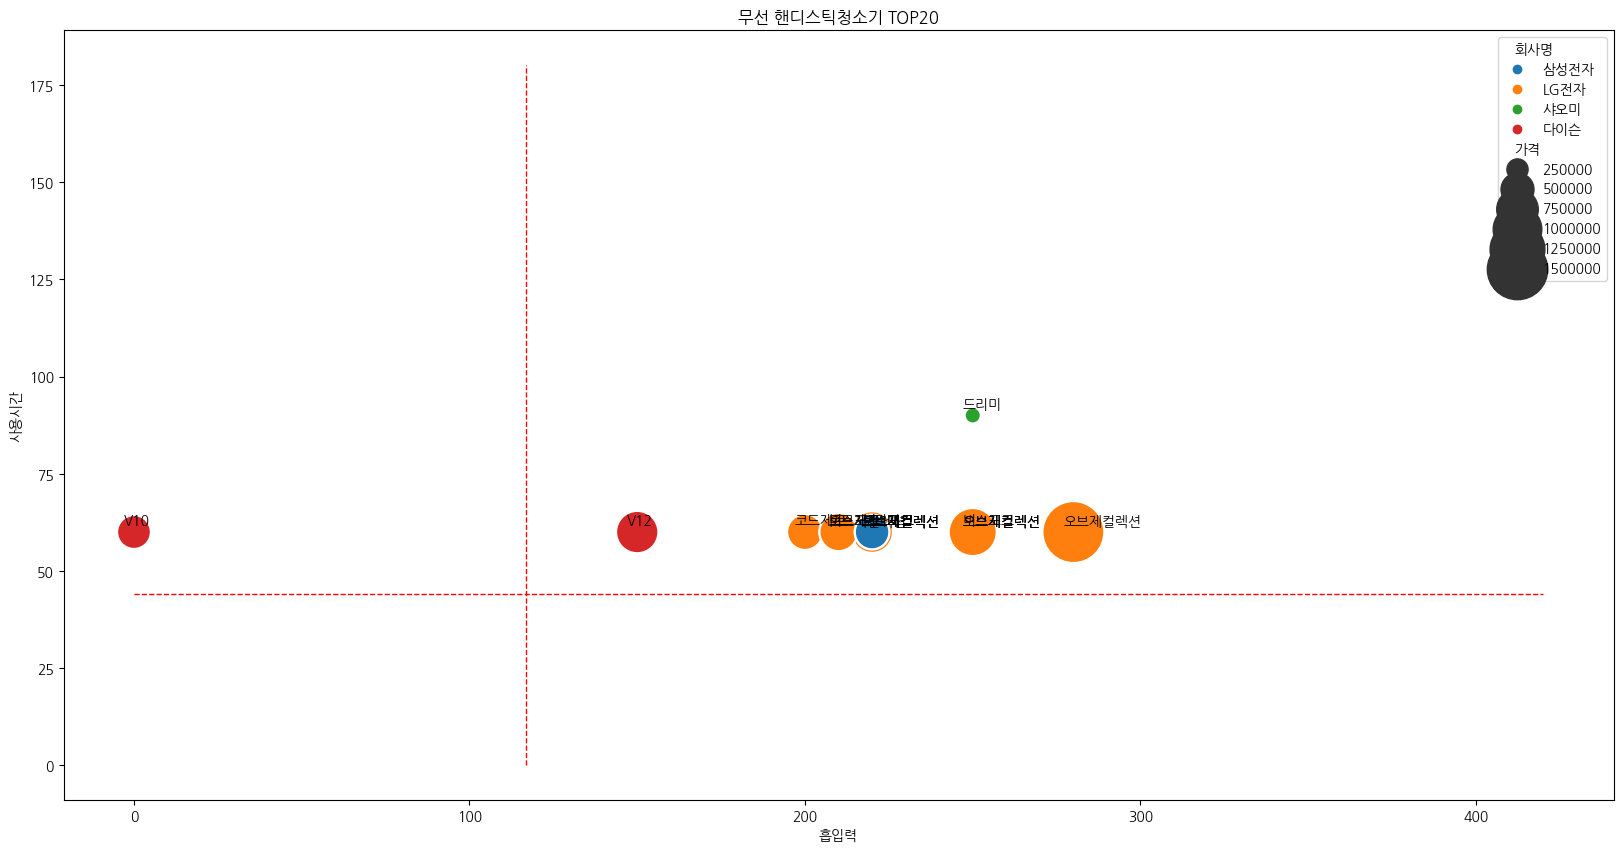

In [64]:
import math

# 20개 제품 시각화
plt.figure(figsize=(20, 10))
plt.title('무선 핸디스틱청소기 TOP20')
sns.scatterplot(data=df_top20, x='흡입력', y='사용시간', size='가격', hue=df_top20['회사명'], sizes=(100, 2000), legend=True)

plt.plot([0, suction_max], [usetime_mean, usetime_mean], 'r--', lw=1)
plt.plot([suction_mean, suction_mean], [0, usetime_max], 'r--', lw=1)

for index, row in df_top20.iterrows():
    x = row['흡입력']
    y = row['사용시간']
    s = row['제품명'].split(' ')[0]
    plt.text(x - 3 , y + 2 ,s ,size=10)

plt.show()